In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import pathlib

import os

*/*.JPG, */*.jpg and */*.* all return different values, meaning the dataset has different file types

In [3]:
train_dir = pathlib.Path('dataset/train')
val_dir = pathlib.Path('dataset/valid')


train_count = len(list(train_dir.glob('*/*.*')))
val_count = len(list(val_dir.glob('*/*.*')))
print(train_count)
print(val_count)


25835
6678


In [4]:
# bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
# early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
# healthy = list(data_dir.glob('Tomato___healthy/*'))
# late_blight = list(data_dir.glob('Tomato___Late_blight/*'))
# leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))
# septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))
# spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))
# target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))
# mosaic = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))
# yellow_leaf_curl = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))

# for img in yellow_leaf_curl:
#     arr = np.array(PIL.Image.open(img))
#     if not (arr.shape == (256, 256, 3)):
#         raise Exception

# subfolders = [ f.path for f in os.scandir('dataset/train') if f.is_dir() ]
# for subdir in subfolders:
#     print(subdir)
#     for file in os.listdir(subdir):
#         if not (file.endswith(".jpg") or file.endswith('JPG') or file.endswith('png') or file.endswith('jpeg')):
#             print(file)
            
    # PIL.Image.open(str(imgs[0]))


# import imghdr

# data_dir = "dataset/valid/Bacterial_spot"
# image_extensions = [".png", ".jpg", "jpeg", "JPG"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in pathlib.Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.unlink(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.unlink(filepath)

from os import listdir
import cv2

#for filename in listdir('C:/tensorflow/models/research/object_detection/images/train'):
yourDirectory = 'dataset/valid/'
corrupted = []
for folder in listdir(yourDirectory):
    print(folder)
    for filename in listdir(yourDirectory+folder):
        # if filename.endswith(".jpg"):
        # print(yourDirectory+filename)
        #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
        try:
            cv2.imread(yourDirectory+folder+'/'+filename)
            # print(filename)
        except:
            print(filename)
            corrupted.add(filename)

print(corrupted)

Bacterial_spot
Early_blight
Late_blight
Leaf_Mold
Septoria_leaf_spot
Spider_mites Two-spotted_spider_mite
Target_Spot
Tomato_Yellow_Leaf_Curl_Virus
Tomato_mosaic_virus
healthy
powdery_mildew
[]


In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25835 files belonging to 11 classes.


2023-02-13 01:50:42.199363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-13 01:50:42.199422: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-13 01:50:42.199471: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vedkm-foliagefixermode-l8v7u6tacyt): /proc/driver/nvidia/version does not exist
2023-02-13 01:50:42.199922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebu

Found 6678 files belonging to 11 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


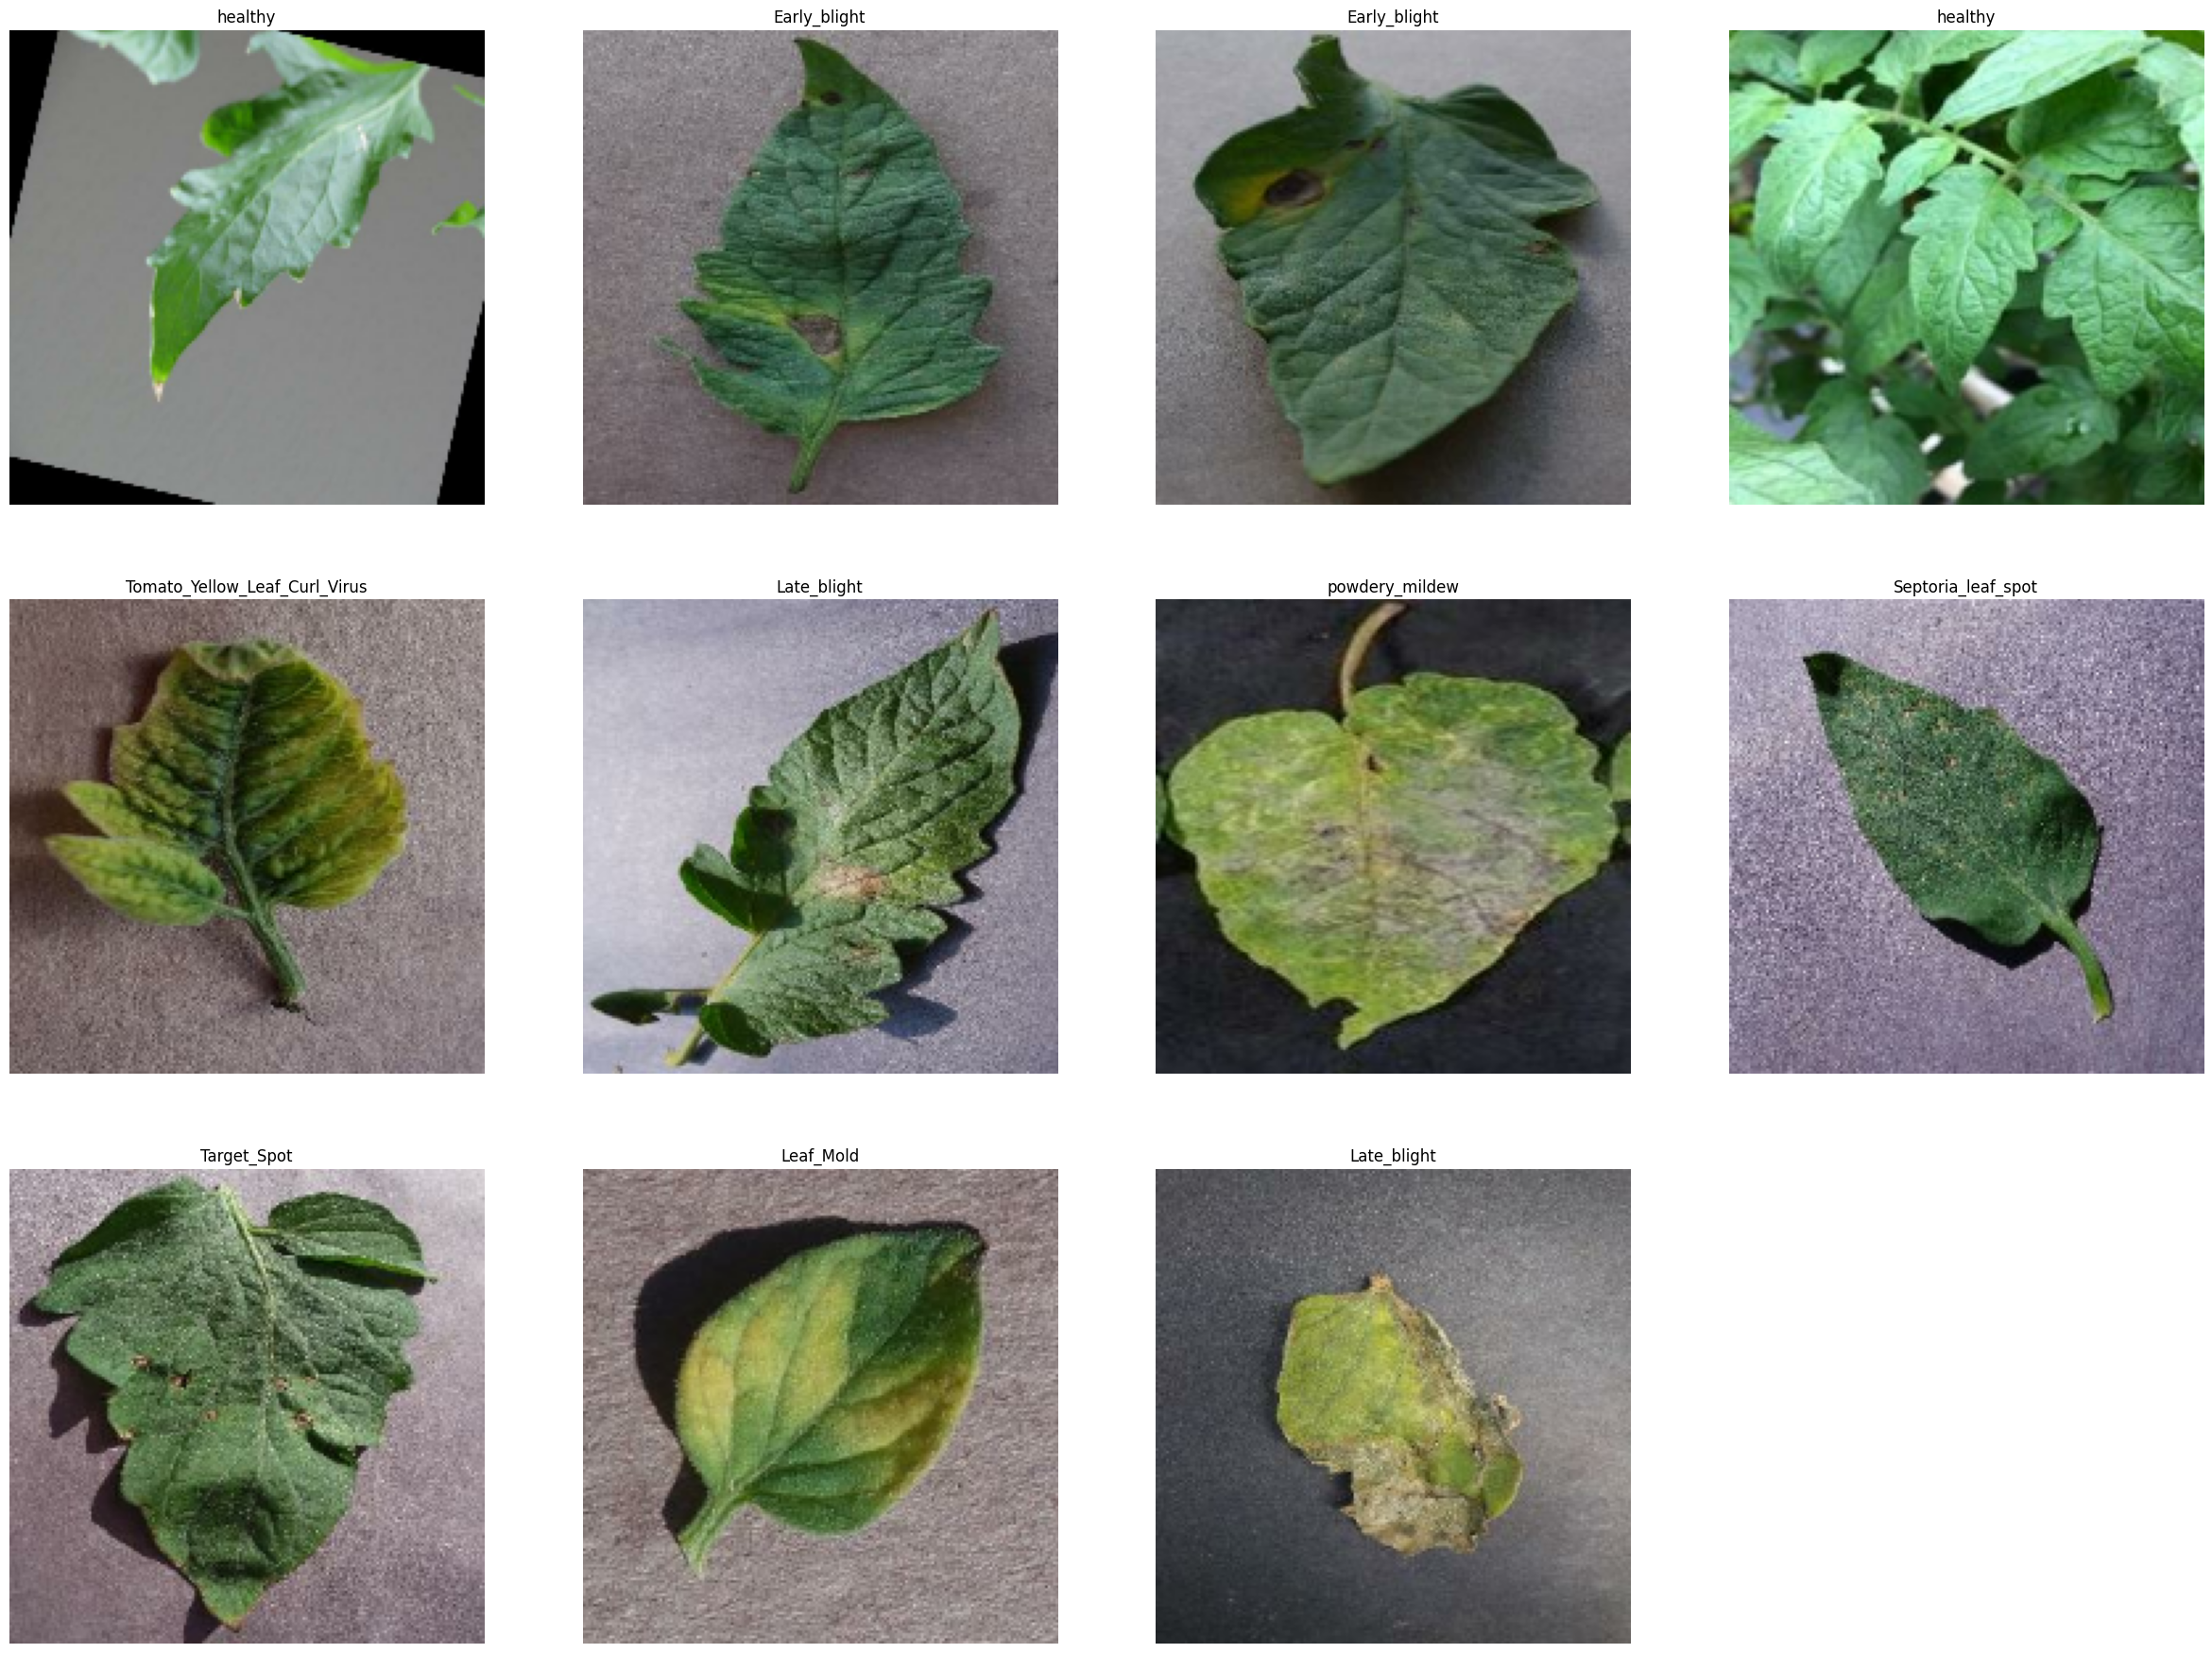

In [7]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(11):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    # layers.RandomCrop(img_height, img_width),
    # layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))
  ]
)

In [11]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [12]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs=35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35


2023-02-13 01:51:06.129317: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 669 of 1000
2023-02-13 01:51:08.211332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


808/808 [==============================] - 364s 431ms/step - loss: 1.2858 - accuracy: 0.5492 - val_loss: 0.8382 - val_accuracy: 0.7140
Epoch 2/35
808/808 [==============================] - 418s 517ms/step - loss: 0.7232 - accuracy: 0.7479 - val_loss: 0.6679 - val_accuracy: 0.7712
Epoch 3/35
808/808 [==============================] - 238s 294ms/step - loss: 0.5739 - accuracy: 0.8009 - val_loss: 1.1149 - val_accuracy: 0.6605
Epoch 4/35
808/808 [==============================] - 191s 236ms/step - loss: 0.5032 - accuracy: 0.8249 - val_loss: 0.7174 - val_accuracy: 0.7683
Epoch 5/35
808/808 [==============================] - 218s 269ms/step - loss: 0.4691 - accuracy: 0.8344 - val_loss: 0.6664 - val_accuracy: 0.7854
Epoch 6/35
808/808 [==============================] - 233s 288ms/step - loss: 0.4049 - accuracy: 0.8560 - val_loss: 0.5172 - val_accuracy: 0.8252
Epoch 7/35
808/808 [==============================] - 282s 349ms/step - loss: 0.3932 - accuracy: 0.8615 - val_loss: 0.6632 - val_accura

In [15]:
import datetime

# print(str(datetime.datetime.now()))
model.save('saved_model/model'+str(datetime.datetime.now()))

INFO:tensorflow:Assets written to: saved_model/model2023-02-13 04:14:10.183464/assets


INFO:tensorflow:Assets written to: saved_model/model2023-02-13 04:14:10.183464/assets


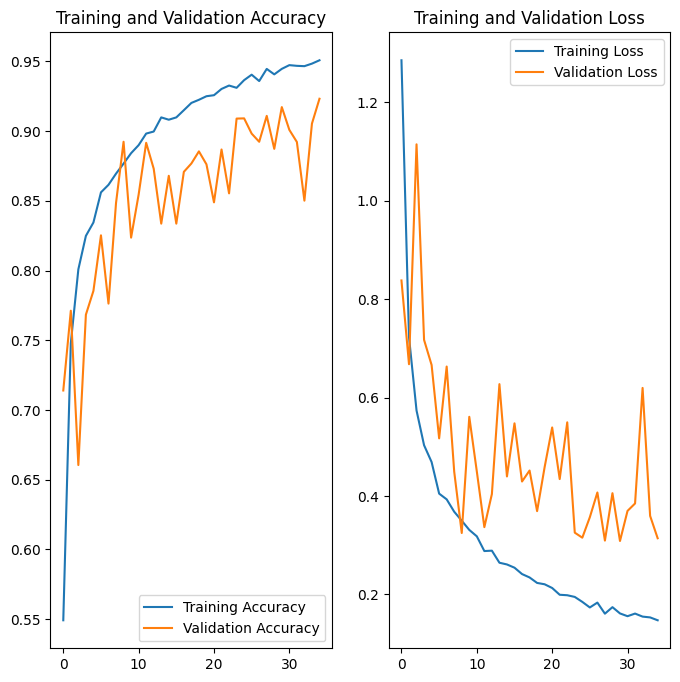

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.evaluate(val_ds)

209/209 [==============================] - 13s 62ms/step - loss: 0.3141 - accuracy: 0.9232


[0.3141483962535858, 0.9231805801391602]

CLASSIFY NEW DATA

In [1]:
leaf_path = pathlib.Path('mosaic2.png')

img = tf.keras.utils.load_img(
    leaf_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'pathlib' is not defined

Bad pipe message: %s [b'\xc0\x8d\x04\x96\xf2\xdfY\x13\xbe\x11\xb6\x8d\xd4\xb5\x8aX\x85O F\xc1\xe2N\xfb\x99\xf8v\xfa\xd9Td\x16\x03a\xca\xe1\xf6P\xd0\x1fF\x94\x009<%\xd2[\x9f\x06\xe3\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00', b'\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 V\xd4s\xec\xaf\x19e\xcaY\x97\xca9\x0b\xed\xa6\x16^\xa6\xe7\x98H\x93a\xa27\xf4F\xaf\x1c\x86\x82l']
Bad pipe message: %s [b'\x825/c\x06\x86\x02\xe9]\x93\xe2F\xe60J\x7f\xc1\x0b\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\